<a href="https://colab.research.google.com/github/TameemAlghazaly/Data-Science-Projects/blob/main/Customer%20Churn%20Classification/Customer%20Churn%20Project%20Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction using Classification

### This project aims to predict whether a customer will churn based on telecom customer data, while also uncovering which features have the most significant impact on churn probability.

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")
try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/TameemAlghazaly/Data-Science-Projects/main/Customer%20Churn%20Classification/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection & Cleaning

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [592]:
df.isnull().sum() / len(df) * 100

,0
customerID,0.795116
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [593]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '', regex=False)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '', regex=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,$151.65,Yes


In [594]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '', regex=False)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [595]:
for col in df.select_dtypes(object).columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].replace(' ', np.nan, regex=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

**Filling the missing values of Total Charges by multiplying the tenure by the monthly charges**

In [597]:
df[["MonthlyCharges", "TotalCharges"]] = df[["MonthlyCharges", "TotalCharges"]].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6987 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [598]:
df['TotalCharges'] = df.apply(
    lambda row: row['tenure']*row['MonthlyCharges'] if np.isnan(row['TotalCharges']) else row['TotalCharges'],
    axis=1
)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [599]:
df.isnull().sum()

,0
customerID,56
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [600]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [601]:
# Encoding the churn column to 1/0 for easier visualization
df['Churn'] = df['Churn'].astype('category').cat.codes

## Exploratory Data Analysis

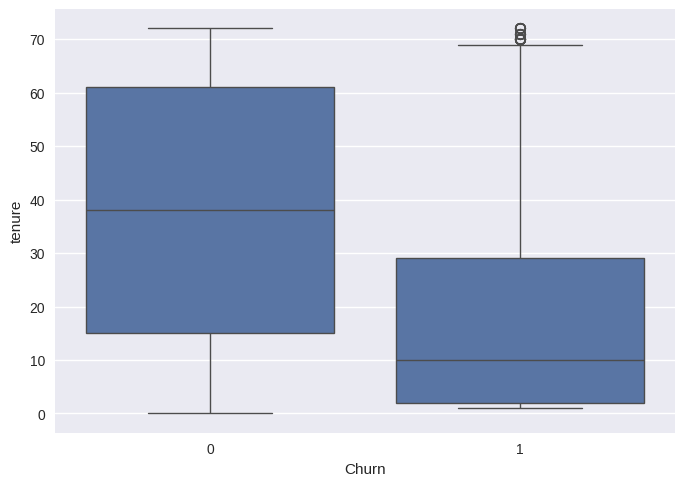

In [602]:
sns.boxplot(x='Churn', y='tenure', data=df);


**75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.**

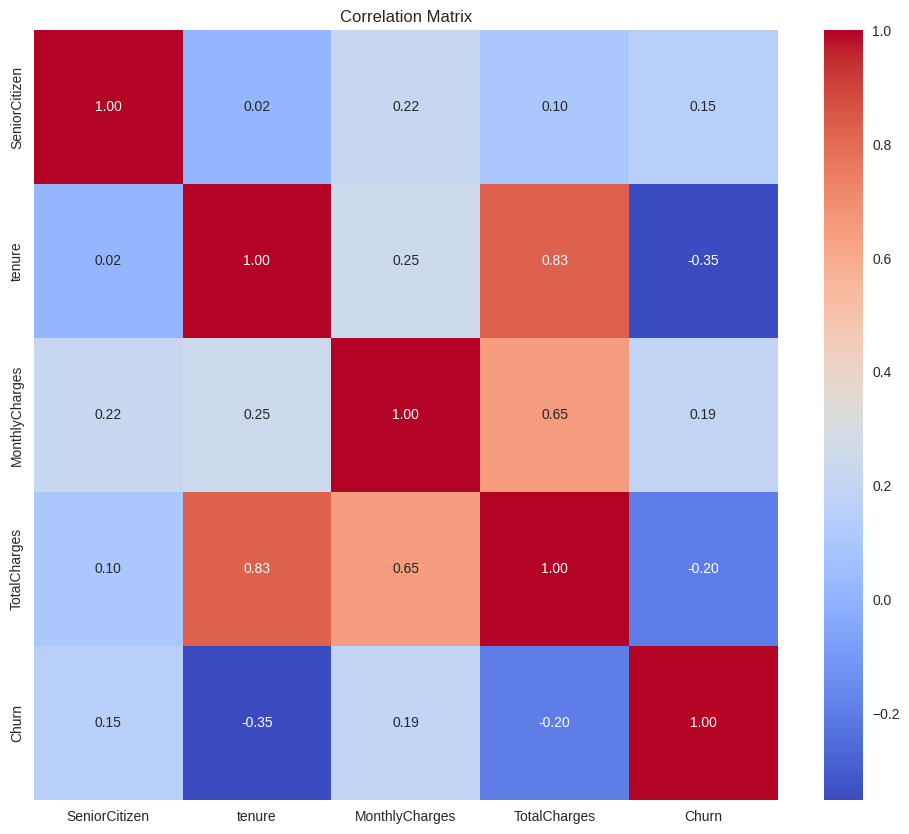

In [603]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**There seems to be high positive correlation between the pairs (tenure, total charges) and (monthly charrges, total charges) which is logical but can lead to multicollinearity , we will use VIF to check for multicollinearity later on.**

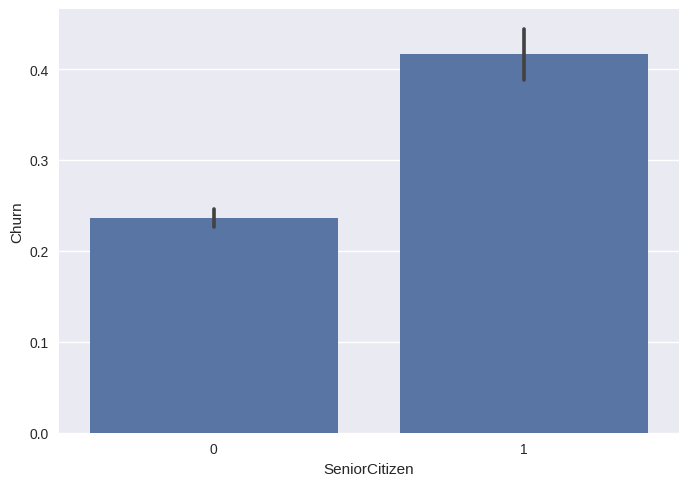

In [604]:
ax = sns.barplot(x='SeniorCitizen', y='Churn', data=df);

**According to the barplot senior citizens are more likely to churn.**

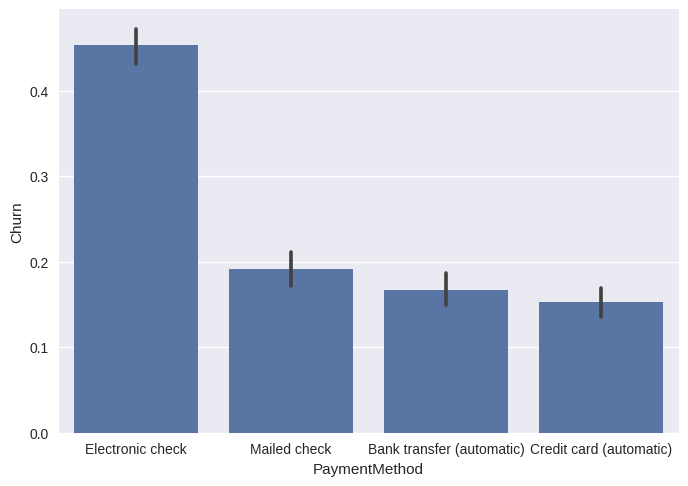

In [605]:
ax = sns.barplot(x='PaymentMethod', y='Churn', data=df)

**According to the barplot Electronic check Payment method has the highet churn rate**

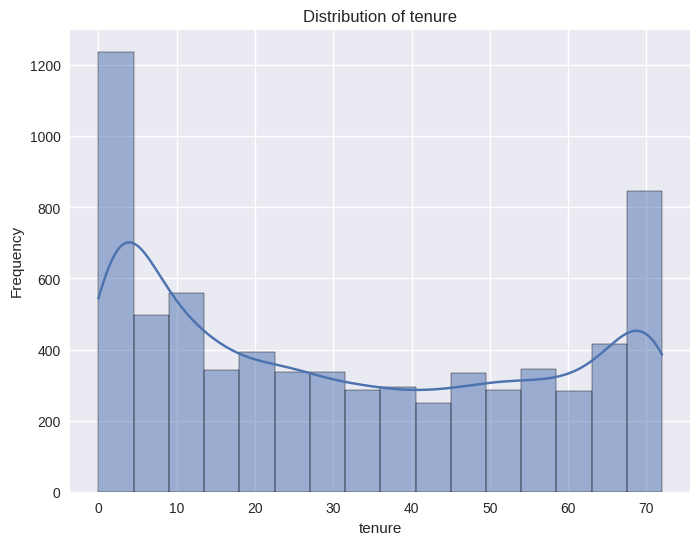

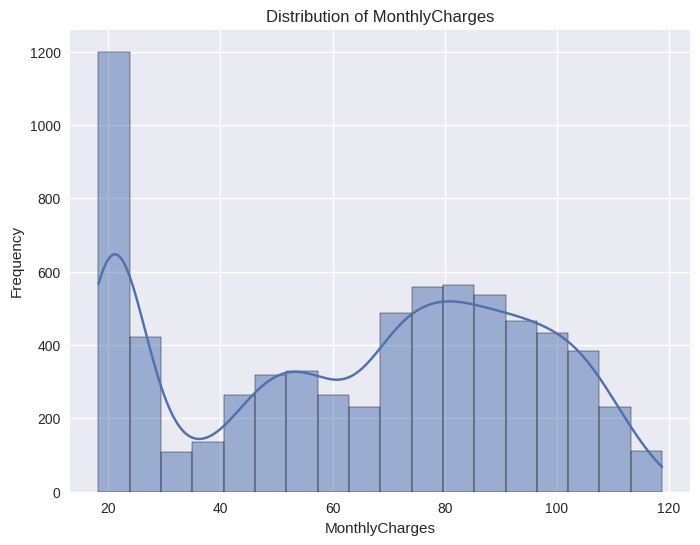

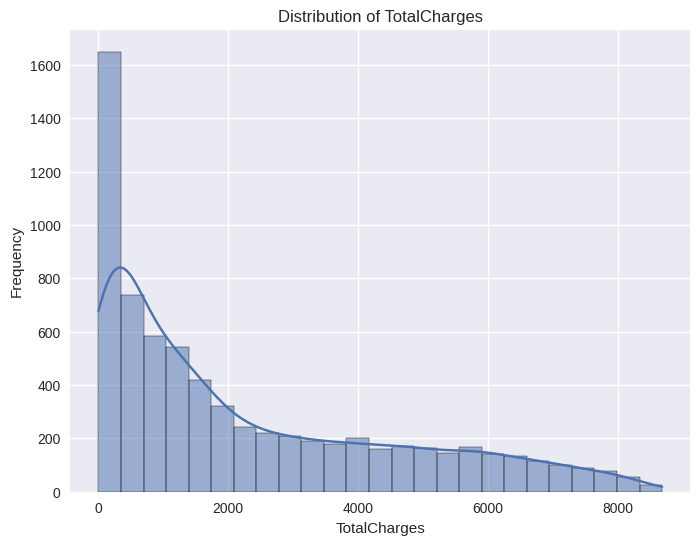

In [606]:
# Histograms for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**There appear to be positive skewness in the total charges column which can be dealt with using log scaling**

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


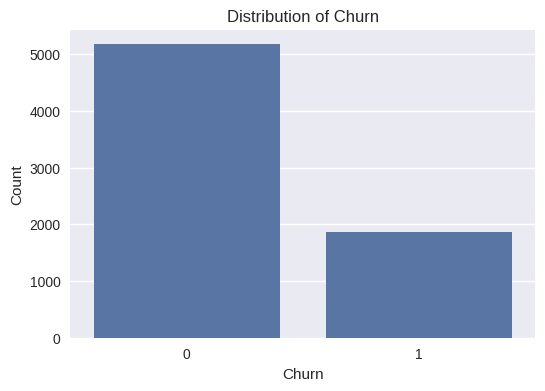

In [607]:
# Checking for class imbalance in the target variable 'Churn'
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.ylabel('Count')
plt.show()

The dataset exhibited **class imbalance**, with significantly more non-churned customers (class 0) than churned customers (class 1).  
This imbalance can bias models toward the majority class, causing them to perform poorly in identifying churners — which is the class we care about most.


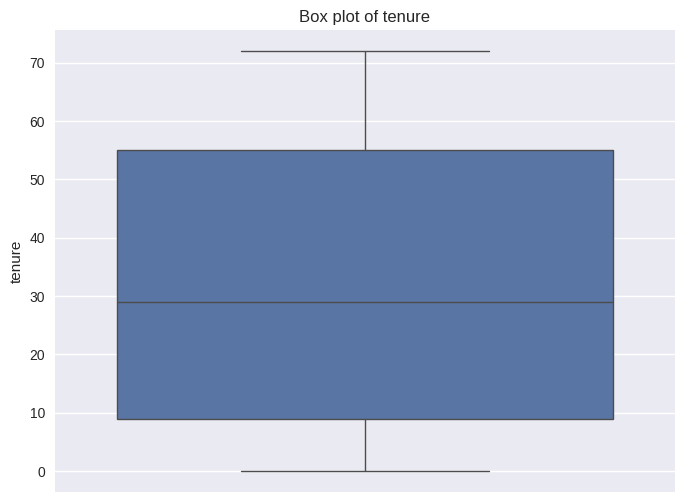

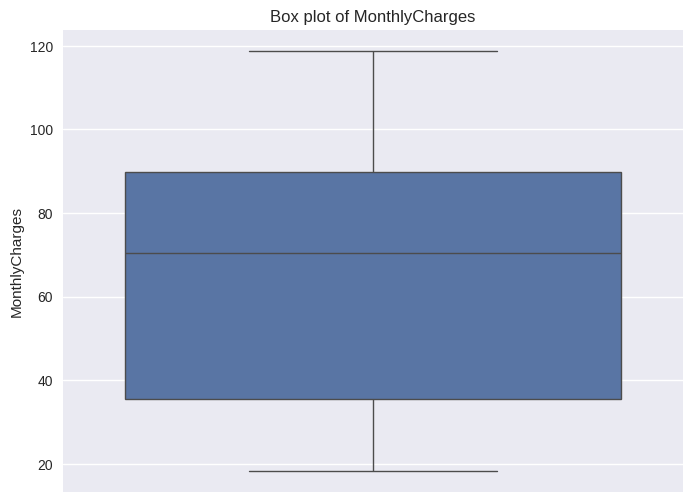

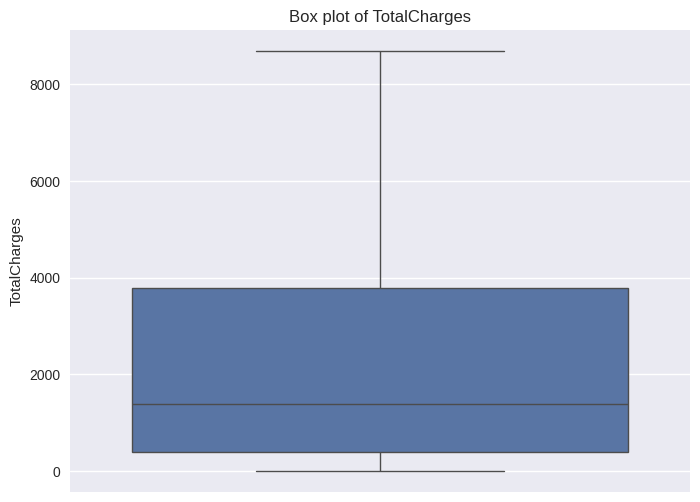

In [608]:
# checking for outliers in numerical columns using box plots
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

**From the boxplots above no outliers appear in the numerical columns.**

## Data Preprocessing

**We will drop the column customerID since it is a unique identifier for each customerr and doesn't provide predictive value for modeling, keeping it would risk overfitting.**

In [609]:
df.drop(['customerID'], axis="columns", inplace=True)

In [610]:
contract_order = ['Month-to-month', 'One year', 'Two year']
df['Contract'] = pd.Categorical(df['Contract'], categories=contract_order, ordered=True)

We will simplify some features for binary encoding.

In [611]:
for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
  df[col] = df[col].replace('No internet service', 'No')

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [612]:
# Using onehot encoding on the categorical columns that have no specific order within the categories
df_encoded = pd.get_dummies(df, dtype='int8', columns=['PaymentMethod','InternetService'],drop_first=True)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,Female,0,Yes,No,1,No,No,No,Yes,No,...,Month-to-month,Yes,29.85,29.85,0,0,1,0,0,0
1,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,One year,No,56.95,1889.50,0,0,0,1,0,0
2,Male,0,No,No,2,Yes,No,Yes,Yes,No,...,Month-to-month,Yes,53.85,108.15,1,0,0,1,0,0
3,Male,0,No,No,45,No,No,Yes,No,Yes,...,One year,No,42.30,1840.75,0,0,0,0,0,0
4,Female,0,No,No,2,Yes,No,No,No,No,...,Month-to-month,Yes,70.70,151.65,1,0,1,0,1,0


In [613]:
# Using label encoding on remaining object columns
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'PaperlessBilling','Contract']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,1,29.85,29.85,0,0,1,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,56.95,1889.50,0,0,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,1,53.85,108.15,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1,0,42.30,1840.75,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,70.70,151.65,1,0,1,0,1,0


**We will be using the variance inflation factor to check for multicolinearty which is considered a problem for a logistic regression model.**

In [614]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = df_encoded.select_dtypes(include=np.number)

x_numeric = numeric_df.drop('Churn', axis=1)

VIF_data = pd.DataFrame()
VIF_data['feature'] = x_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

VIF_data

,feature,VIF
0,gender,2.021478
1,SeniorCitizen,1.376053
2,Partner,2.827131
3,Dependents,1.976224
4,tenure,20.269819
5,PhoneService,47.092539
6,MultipleLines,2.840382
7,OnlineSecurity,2.685864
8,OnlineBackup,2.907630
9,DeviceProtection,2.994152


**We will drop the monthly charges column since it has high VIF value which indicates multicolinearity.**

In [615]:
df_encoded = df_encoded.drop(['MonthlyCharges'], axis=1)
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,29.85,0,0,1,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,1889.50,0,0,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,0,0,1,108.15,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,1840.75,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,151.65,1,0,1,0,1,0


In [616]:
# Checking VIF agian after dropping monhly charges
numeric_df = df_encoded.select_dtypes(include=np.number)

x_numeric = numeric_df.drop('Churn', axis=1)

VIF_data = pd.DataFrame()
VIF_data['feature'] = x_numeric.columns
VIF_data['VIF'] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

VIF_data

,feature,VIF
0,gender,1.941875
1,SeniorCitizen,1.365548
2,Partner,2.819622
3,Dependents,1.968285
4,tenure,16.889105
5,PhoneService,9.239555
6,MultipleLines,2.500660
7,OnlineSecurity,1.985826
8,OnlineBackup,2.180286
9,DeviceProtection,2.297220


In [617]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_enc = df_encoded.drop('Churn', axis=1) # Independent variable
y_enc = df_encoded['Churn'] # Dependent variable

X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(X_enc, y_enc, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_enc_train, y_enc_train = smote.fit_resample(X_enc_train, y_enc_train)

print('Training dataset size:', X_enc_train.shape[0])
print('Testing dataset size:', X_enc_test.shape[0])

Training dataset size: 7270
Testing dataset size: 2113


To address the class imbalance issue, we applied **SMOTE (Synthetic Minority Over-sampling Technique)**, which works by generating synthetic examples of the minority class (churners) rather than simply duplicating them.

By using SMOTE **only on the training data**, we ensured the model sees a balanced dataset during training while maintaining a realistic, imbalanced test set for evaluation, thus preventing data leakage and preserving real-world performance measurement.

##  Model Evaluation and Comparison

Given the business objective of predicting customer churn, we prioritized performance on the **churn class (class 1)** over overall accuracy.  
In real-world applications, **failing to detect a churner (false negative)** can be more costly than **wrongly flagging a loyal customer (false positive)**.  

Therefore, we focused on:
- **Recall** and **F1-score** for class 1  
- **AUC** (Area Under the ROC Curve) as a threshold-independent metric

---

### Logistic Regression




              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1539
           1       0.56      0.73      0.63       574

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113

[[1207  332]
 [ 157  417]]


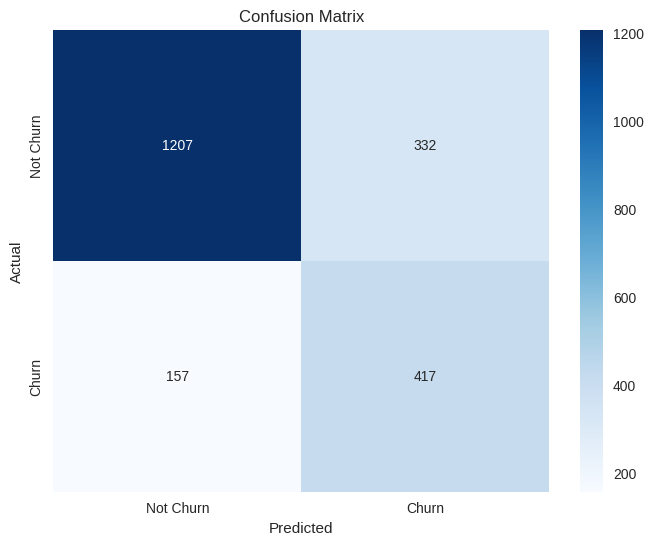

In [618]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_enc_train, y_enc_train)
y_pred_lr = lr_model.predict(X_enc_test)
print(classification_report(y_enc_test, y_pred_lr))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_enc_test, y_pred_lr)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression yielded the **best performance** on the churn class:

- **Recall (class 1)**: `0.73` → *highest among all models*
- **Precision (class 1)**: `0.56`
- **F1-score (class 1)**: `0.63` → *highest overall*
- **AUC**: `0.83` → *indicates strong class separation*

This model is particularly effective in identifying churners while maintaining a moderate false positive rate.  
Its simplicity and interpretability make it a strong **baseline model for deployment**.

---

### Random Forest




              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1539
           1       0.55      0.58      0.56       574

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.76      0.76      0.76      2113

[[1271  268]
 [ 243  331]]


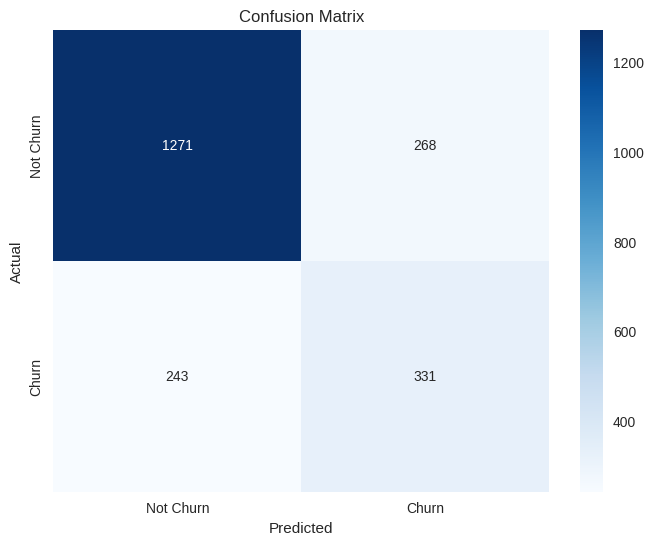

In [619]:
from sklearn.ensemble import RandomForestClassifier

random_forest= RandomForestClassifier(random_state=42)
random_forest.fit(X_enc_train, y_enc_train)

y_pred_rf = random_forest.predict(X_enc_test)
print(classification_report(y_enc_test, y_pred_rf))
cm = confusion_matrix(y_enc_test, y_pred_rf)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest showed the **weakest performance** on the churn class:

- **Recall (class 1)**: `0.56` → *lowest among all models*
- **F1-score (class 1)**: `0.56`
- **AUC**: `0.82`

Although it achieved reasonable accuracy for the majority class, it missed a significant number of churners, resulting in **poor suitability** for our use case.

---

### Advanced Model Performance Evaluation: XGBoost vs. CatBoost

### XGBoost


In [620]:
import xgboost as xgb

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_enc_train, y_enc_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_enc_test)


              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1539
           1       0.56      0.58      0.57       574

    accuracy                           0.76      2113
   macro avg       0.70      0.71      0.70      2113
weighted avg       0.77      0.76      0.76      2113

[[1277  262]
 [ 240  334]]


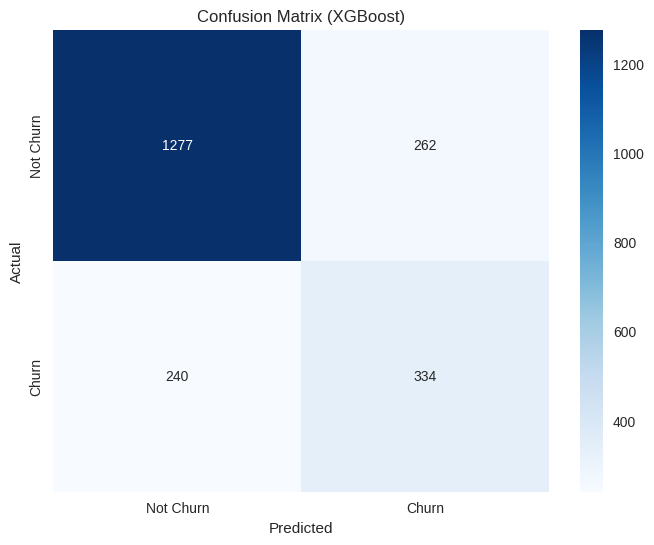

In [621]:
print(classification_report(y_enc_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_enc_test, y_pred_xgb)
print(cm_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()


XGBoost offered **moderate performance** on the churn class:

- **Recall (class 1)**: `0.58`
- **Precision (class 1)**: `0.58`
- **F1-score (class 1)**: `0.58`
- **AUC**: `0.82`

While XGBoost slightly outperformed Random Forest, it still lagged behind in recall and overall F1-score for the churn class, making it less ideal for scenarios where capturing churners is critical.

---

### CatBoost




In [622]:
#!pip install catboos
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Make a copy and encode categorical columns
df_Catboost = df.copy()
categorical_cols = df_Catboost.select_dtypes(include=['object', 'category']).columns
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_Catboost[col] = le.fit_transform(df_Catboost[col])
    le_dict[col] = le

In [623]:
X = df_Catboost.drop('Churn', axis=1)
y = df_Catboost['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Identify categorical feature indices (based on original df, not encoded)
cat_features = [X.columns.get_loc(col) for col in categorical_cols]

# 5. Train CatBoost on resampled data
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train_resampled, y_train_resampled, cat_features=cat_features)

# 6. Predict on the original (unmodified) test set
y_pred_catboost = catboost_model.predict(X_test)



CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1539
           1       0.58      0.66      0.62       574

    accuracy                           0.78      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.78      0.78      2113


CatBoost Confusion Matrix:
[[1262  277]
 [ 194  380]]


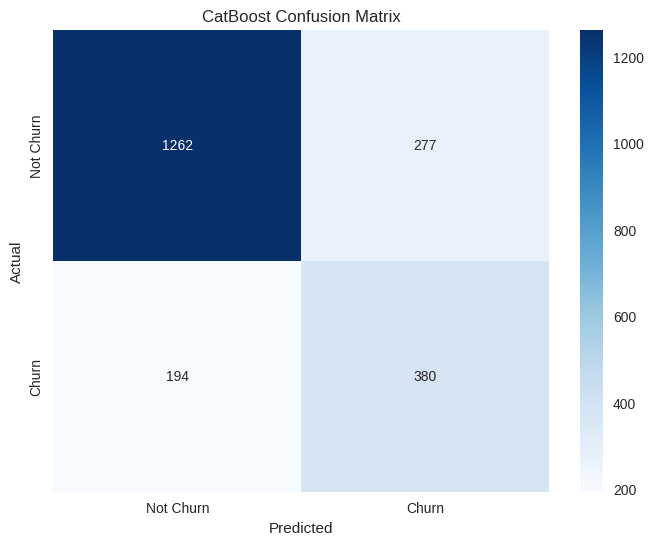

In [624]:
# Print classification report for CatBoost
print("\nCatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Print confusion matrix for CatBoost
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
print("\nCatBoost Confusion Matrix:")
print(cm_catboost)

# Plot confusion matrix for CatBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix')
plt.show()

CatBoost also performed well and came **very close** to Logistic Regression:

- **Recall (class 1)**: `0.66`
- **Precision (class 1)**: `0.58`
- **F1-score (class 1)**: `0.62`
- **AUC**: `0.83`

CatBoost's **native handling of categorical features** and **non-linear interactions** makes it a powerful alternative, especially in production settings where feature complexity is high.

---

In [625]:
from sklearn.metrics import roc_curve, roc_auc_score
# Get predicted probabilities for the positive class (Churn=1)
y_prob_lr = lr_model.predict_proba(X_enc_test)[:, 1]
y_prob_rf = random_forest.predict_proba(X_enc_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_enc_test)[:, 1]
# Need to predict on the original test set for CatBoost as it was trained on it
y_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]
# Calculate ROC curves
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_enc_test, y_prob_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_enc_test, y_prob_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_enc_test, y_prob_xgb)
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_prob_catboost)
# Calculate AUC scores
auc_lr = roc_auc_score(y_enc_test, y_prob_lr)
auc_rf = roc_auc_score(y_enc_test, y_prob_rf)
auc_xgb = roc_auc_score(y_enc_test, y_prob_xgb)
auc_catboost = roc_auc_score(y_test, y_prob_catboost)

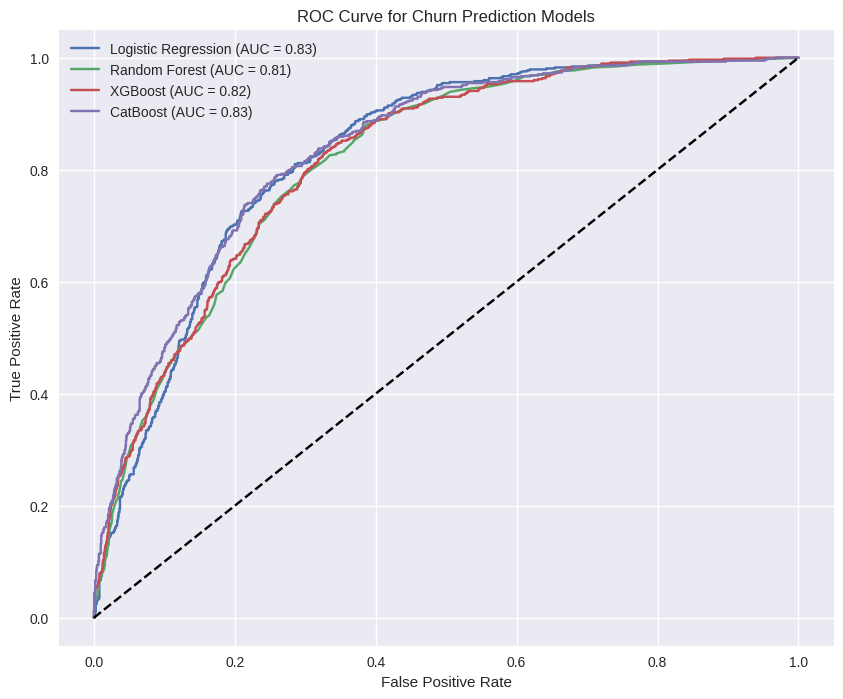

AUC for Logistic Regression: 0.83
AUC for Random Forest: 0.81
AUC for XGBoost: 0.82
AUC for CatBoost: 0.83


In [626]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {auc_catboost:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction Models')
plt.legend()
plt.show()
# Print AUC scores
print(f'AUC for Logistic Regression: {auc_lr:.2f}')
print(f'AUC for Random Forest: {auc_rf:.2f}')
print(f'AUC for XGBoost: {auc_xgb:.2f}')
print(f'AUC for CatBoost: {auc_catboost:.2f}')


---

### Summary

- **Logistic Regression** emerged as the **best-performing model** in detecting churners, achieving the **highest recall and AUC**.
- **CatBoost** also showed **strong performance**, especially valuable in complex data scenarios involving categorical features.

Both models are **suitable for deployment**, depending on the **interpretability vs. complexity** trade-off preferred by the business.

---
